# Практическая работа №2

# Свёрточные нейронные сети: Обнаружение объектов с использованием YOLO

## Выполнила: ИСУ - 472460, Сегень Р.А., группа R4135c

# 1. Цели и задачи

**Цель работы:**

Изучить процесс обнаружения объектов с помощью свёрточных нейронных сетей на примере архитектуры YOLO (You Only Look Once)v11. Научиться работать с готовыми размеченными наборами данных, выполнять предобработку данных, обучать модель и оценивать её качество.

**Задачи:**

* Изучить библиотеки и инструменты для работы с YOLOv11 (например, Ultralytics YOLO, PyTorch, TensorFlow).
* Выбрать или создать набор данных:
* *  Использовать готовый размеченный датасет из Roboflow Universe.
* * Разметить собственные данные через Roboflow или CVAT.
* Загрузить и предобработать данные.
* Разделить данные на обучающую, валидационную и тестовую выборки.
* Обучить модель YOLOv11 на обучающей выборке.
* Оценить качество модели на валидационной и тестовой выборках.
* Подобрать оптимальные гиперпараметры модели.
* Визуализировать результаты обучения и оценки качества модели.
* Протестировать модель на новых изображениях.

In [1]:
# проверка загрузки датасета
ls /kaggle/input/

mydata/


# 2. Описание датасета

## 2.1 Источники данных

В качестве данных был выбран датасет на сайте [Roboflow](https://universe.roboflow.com/), Cards. Датасет был скачен и загружен на Kaggle.
## 2.2 Количество изображений, классов.
Датасет включает 24 240 в виде игральных карт изображений. 52 класса. Применены различные аугментации: горизонтального и вертикального отражения, повороты на 90 градусов, перевернутые изображения, шумы, случайная регулировка яркости и экспозиции.



In [2]:
import yaml

# путь к файлу конфигурации датасета
config_path = '/kaggle/input/mydata/data.yaml'

# файл конфигурации
with open(config_path, 'r') as file:
    data_config = yaml.safe_load(file)

# количество классов
num_classes = data_config['nc']
class_names = data_config['names']

print(f"Количество классов: {num_classes}")
print(f"Названия классов: {class_names}")



Количество классов: 52
Названия классов: ['10C', '10D', '10H', '10S', '2C', '2D', '2H', '2S', '3C', '3D', '3H', '3S', '4C', '4D', '4H', '4S', '5C', '5D', '5H', '5S', '6C', '6D', '6H', '6S', '7C', '7D', '7H', '7S', '8C', '8D', '8H', '8S', '9C', '9D', '9H', '9S', 'AC', 'AD', 'AH', 'AS', 'JC', 'JD', 'JH', 'JS', 'KC', 'KD', 'KH', 'KS', 'QC', 'QD', 'QH', 'QS']


## 2.3 Примеры изображений с разметкой.

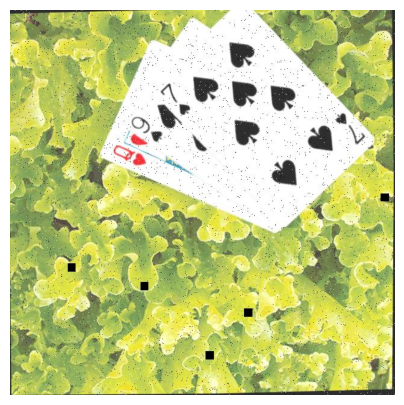

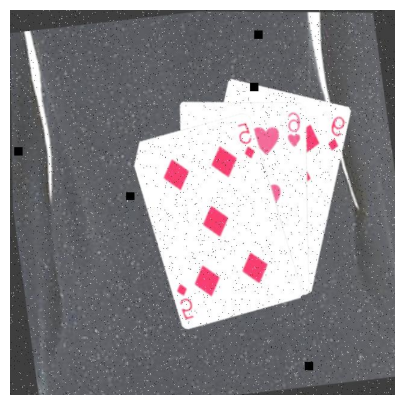

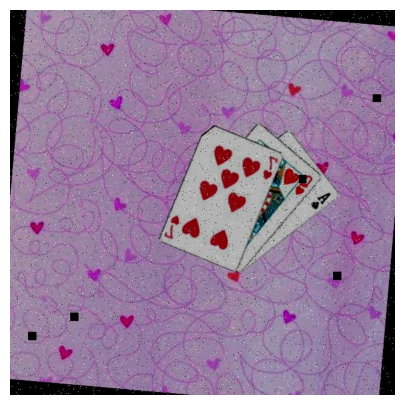

In [3]:
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# путь к директории с тренировочными изображениями
train_images_dir = '/kaggle/input/mydata/train/images' 

# список всех изображений в директории
image_files = [os.path.join(train_images_dir, f) for f in os.listdir(train_images_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

for _ in range(3):  # 3 случайных изображения
    random_image_path = random.choice(image_files)
    img = mpimg.imread(random_image_path)
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()


In [4]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.9/921.9 kB 28.3 MB/s eta 0:00:00


In [7]:
ls /kaggle/input/mydata/train/


images/  labels/


# 3. Методология
## 3.1 Параметры обучения.
Основные параметры обучения YOLO:
Размер изображения ```img_size```, количество эпох ```epochs```, размер батча ```batch_size```, cкорость обучения ```lr```, оптимизатор ```optimizer``` (SGD, Adam, AdamW).

Функция потерь (loss function):
```box_loss``` ошибка предсказания bounding boxes.
```cls_loss``` ошибка классификации. Показывает, насколько точно модель определяет класс объекта.
```dfl_loss``` ошибка распределения вероятностей


In [8]:
from ultralytics import YOLO


model = YOLO("yolo11n.pt")

# обучение
results = model.train(data="/kaggle/input/mydata/data.yaml", epochs=3, imgsz=640, batch = 32)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 98.2MB/s]


Ultralytics 8.3.80 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/input/mydata/data.yaml, epochs=3, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

100%|██████████| 755k/755k [00:00<00:00, 27.9MB/s]


Overriding model.yaml nc=80 with nc=52

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /kaggle/input/mydata/train/labels... 21203 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21203/21203 [01:32<00:00, 228.86it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/mydata/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.4 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/mydata/valid/labels... 2020 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2020/2020 [00:09<00:00, 203.39it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/mydata/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000179, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      4.88G      1.638      4.541      1.145        124        640: 100%|██████████| 663/663 [03:59<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:15<00:00,  2.11it/s]


                   all       2020       8080     0.0619      0.307     0.0715      0.041

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      4.57G      1.378      2.963      1.054        124        640: 100%|██████████| 663/663 [03:51<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:13<00:00,  2.38it/s]


                   all       2020       8080       0.36      0.592      0.433      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      4.58G      1.321      2.343      1.045        123        640: 100%|██████████| 663/663 [03:53<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:13<00:00,  2.33it/s]


                   all       2020       8080      0.625      0.709      0.718      0.503

3 epochs completed in 0.210 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.80 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,592,292 parameters, 0 gradients, 6.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:15<00:00,  2.01it/s]


                   all       2020       8080      0.624      0.711      0.717      0.503
                   10C        129        172      0.913      0.907      0.964      0.704
                   10D        124        161      0.827      0.863      0.916       0.63
                   10H        103        148      0.632      0.993      0.895      0.665
                   10S        112        153      0.743       0.98      0.969      0.723
                    2C        106        144       0.74      0.889      0.881      0.671
                    2D        117        165      0.575      0.483      0.544       0.37
                    2H        136        183      0.656      0.404      0.562      0.409
                    2S        102        137      0.788      0.642      0.785      0.611
                    3C        122        176      0.588      0.977      0.864      0.623
                    3D        106        145      0.423      0.674      0.568      0.412
                    3

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train


box_loss: Значение функции потерь для bounding box (чем меньше, тем лучше). Это метрика, которая показывает, насколько хорошо модель предсказывает координаты объектов.

cls_loss: Значение функции потерь для классификации (чем меньше, тем лучше). Это метрика, которая показывает, насколько хорошо модель определяет класс объекта.

dfl_loss: Значение функции потерь для распределения вероятностей (Distribution Focal Loss). Это метрика, связанная с предсказанием уверенности модели.

Instances: Количество объектов (инстансов), которые были обнаружены на изображениях в текущей эпохе.

Точность (Precision) для bounding box. Это доля правильно обнаруженных объектов среди всех предсказанных.

Полнота (Recall) для bounding box. Это доля правильно обнаруженных объектов среди всех реальных объектов.

mAP50: Средняя точность (mean Average Precision).

mAP50-95: Средняя точность при IoU порогах от 0.5 до 0.95 с шагом 0.05.

In [9]:
metrics = model.val()  # Оценка на валидационной выборке

Ultralytics 8.3.80 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,592,292 parameters, 0 gradients, 6.4 GFLOPs


val: Scanning /kaggle/input/mydata/valid/labels... 2020 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2020/2020 [00:03<00:00, 645.19it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/mydata/valid is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:18<00:00,  3.46it/s]


                   all       2020       8080      0.624      0.711      0.718      0.503
                   10C        129        172      0.913      0.907      0.964      0.704
                   10D        124        161      0.827      0.863      0.916      0.631
                   10H        103        148      0.633      0.993      0.895      0.662
                   10S        112        153      0.742       0.98       0.97      0.722
                    2C        106        144      0.741      0.889       0.88      0.667
                    2D        117        165      0.577      0.485      0.544      0.373
                    2H        136        183      0.659      0.404      0.563      0.411
                    2S        102        137      0.788      0.642      0.786       0.61
                    3C        122        176       0.59      0.977      0.864      0.628
                    3D        106        145      0.422      0.671      0.568      0.413
                    3

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.5ms preprocess, 4.0ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train2


In [10]:
results = model('/kaggle/input/mydata/test/images', save=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1010 /kaggle/input/mydata/test/images/001771721_jpg.rf.687025a63ae5c9e58f2454ab1e41eaa9.jpg: 640x640 2 7Ss, 1 8S, 1 AH, 9.9ms
image 2/1010 /kaggle/input/mydata/test/images/001783412_jpg.rf.7cec603b241d2bf2482ffbcdc4768def.jpg: 640x640 1 3S, 2 5Cs, 2 8Cs, 8.0ms
image 3/1010 /kaggle/input/mydata/test/images/002352486_jpg.rf.d49841091883307acc1a1e5649420c56.jpg: 640x640 1 7D, 2 9Cs, 1 AD, 1 JS, 1 KS, 8.1ms
image 4/1010 /kaggle/input/mydata/test/im

Выведем 1001 изображение из тестовой выборки.

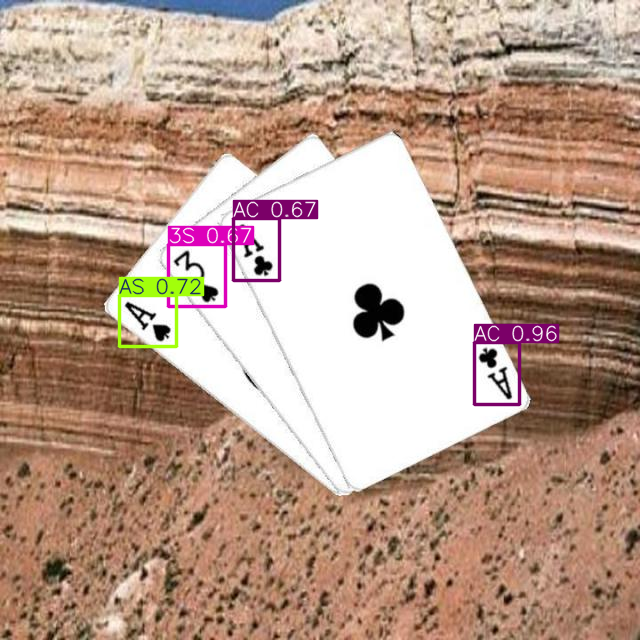

In [16]:
if results:
    
    results[1000].show()  # визуализируем результаты
else:
    print("Результаты не найдены.")

F1-мера — это метрика, которая объединяет Precision (точность) и Recall (полнота) в одно значение, позволяет оценить производительность модели одним числом, учитывая как ложные срабатывания (Precision), так и пропуски (Recall)

In [17]:
# Extract metrics
precision = metrics.box.mp  # Точность обнуражения объектов (процент предсказанных bb является верным)
recall = metrics.box.mr  # доля правильного обнаружения объектов среди всех реальных объектов
map_50_95 = metrics.box.map  #ср. точность по всем классам и порогам

print("Precision - точность", precision)
print("Recall - полнота (доля)", recall)
print("mAP50-95 - ср. точность", map_50_95)

Precision - точность 0.6239092782449737
Recall - полнота (доля) 0.7109364611516507
mAP50-95 - ср. точность 0.5034460658103106


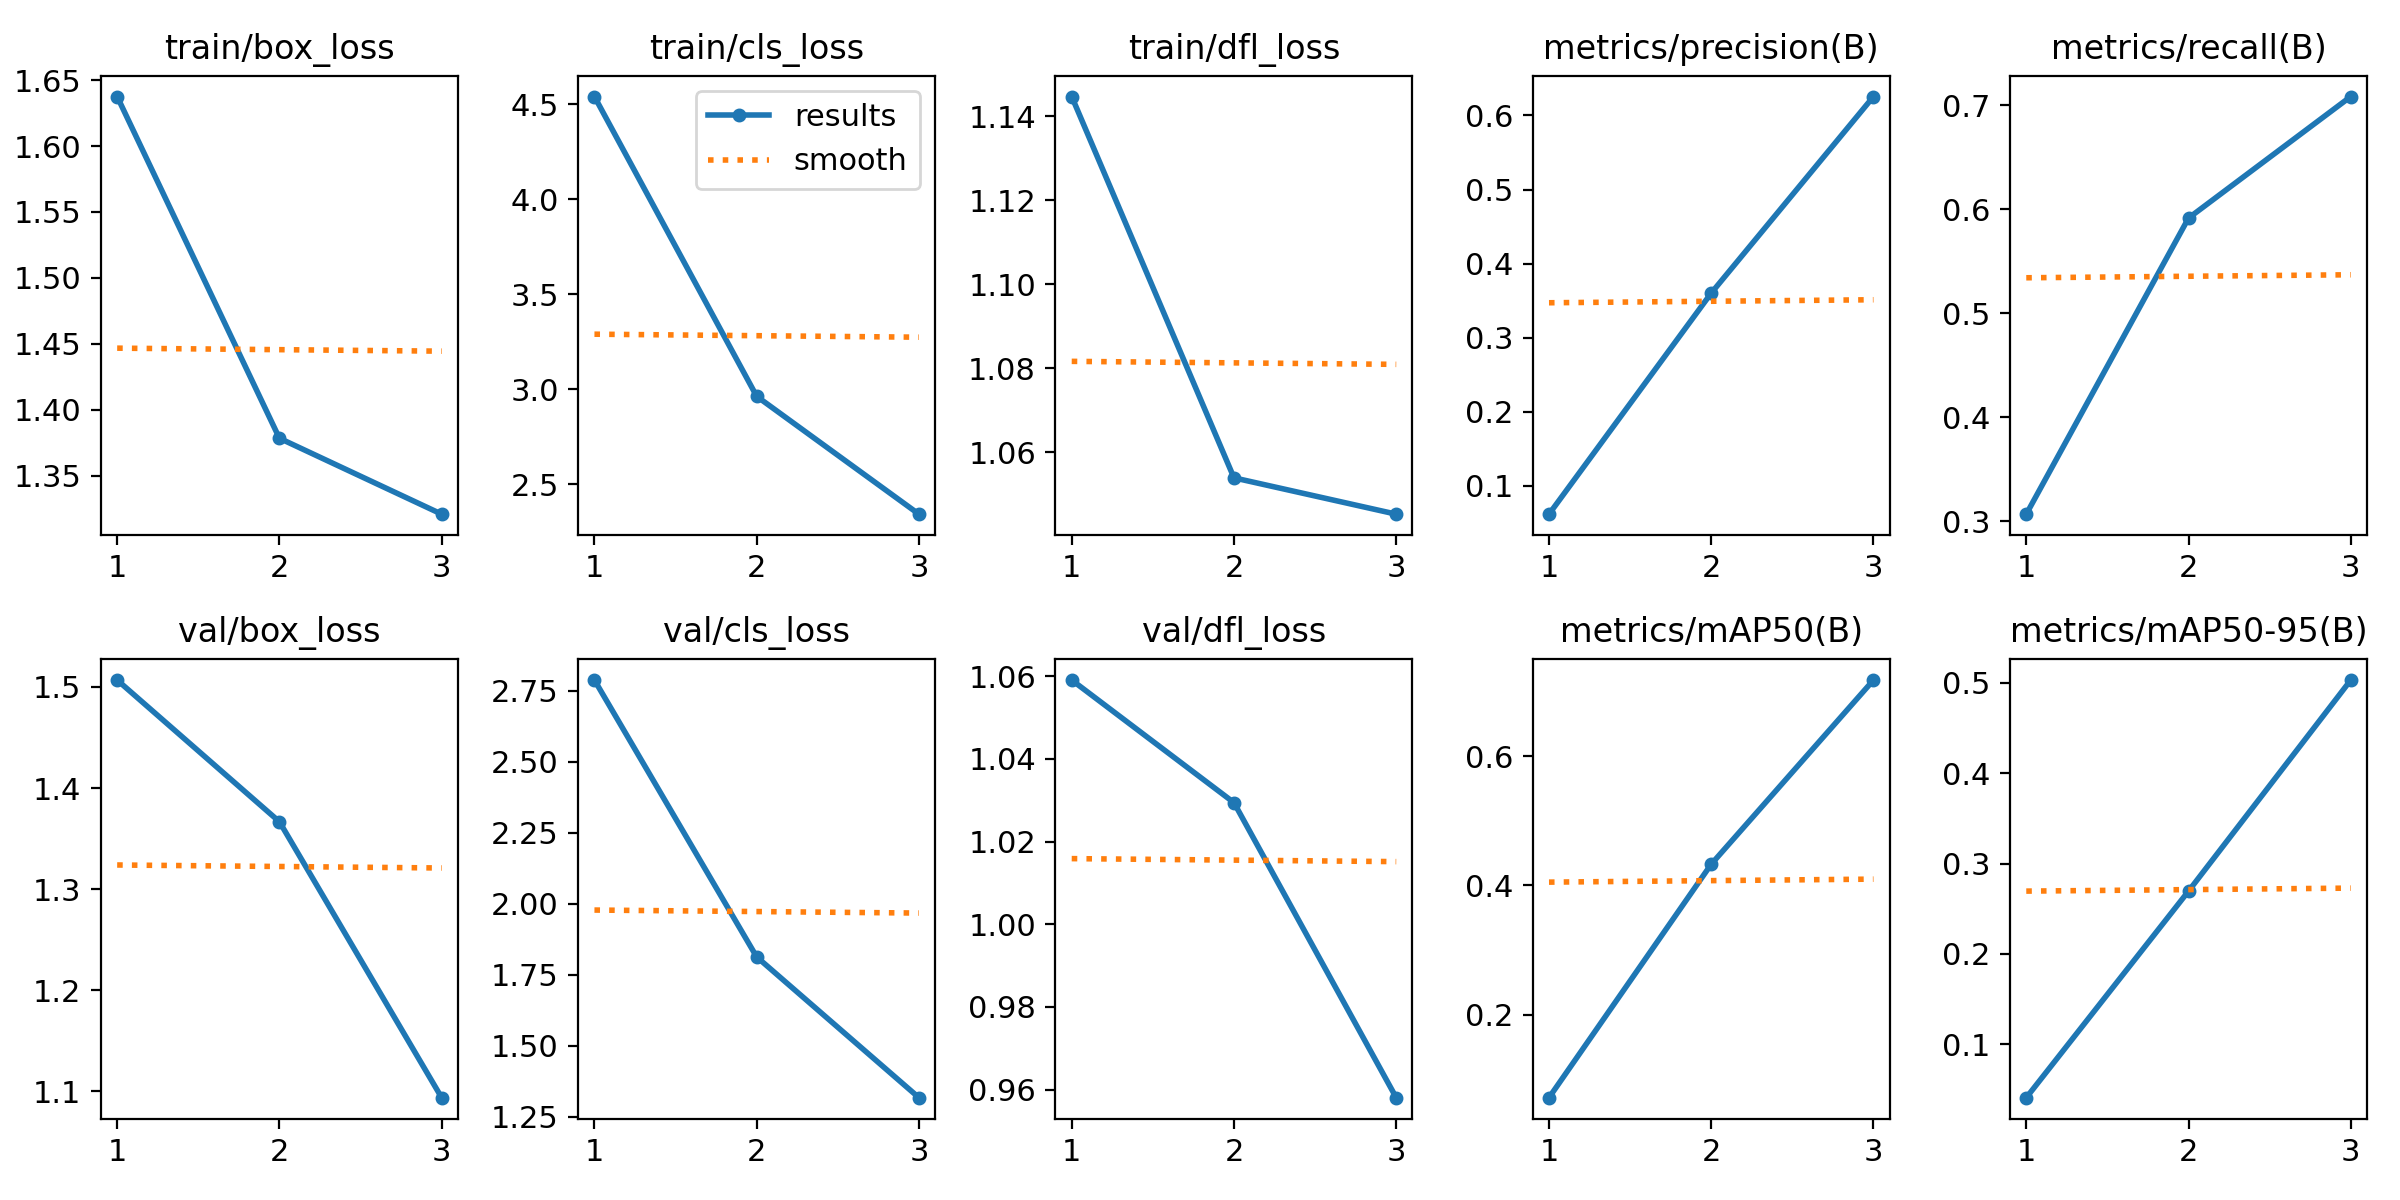

In [14]:
from PIL import Image

img = Image.open("/kaggle/working/runs/detect/train/results.png")

img


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Укажите путь к директории с изображениями
directory = '/kaggle/working/runs/detect/train23'

# Создайте фигуру и оси для сетки 3x5
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(10, 10))  # 3 строки, 5 столбцов

# Соберите пути к изображениям
image_paths = [os.path.join(directory, filename) for filename in os.listdir(directory)]

# Отобразите изображения (максимум 15, так как 3x5 = 15)
for i, img_path in enumerate(image_paths[:15]):
    img = mpimg.imread(img_path)
    ax = axes[i // 5, i % 5]  # Индексация: i // 5 для строк, i % 5 для столбцов
    ax.imshow(img)
    ax.axis('off')  # Удалите оси

plt.tight_layout()  # Автоматическая настройка отступов
plt.show()